### Student Information
Name: 黃莉雯

Student ID: 111034532

GitHub ID: liwen0217

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

## Exercises

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
##we want to get the 4 categories we listed above from the "train" data set
##The order of data is a potential factor that affects our analysis, so we usually specify shuffle as True.
##We specify a random state to ensure the results are reproducible

In [3]:
import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
##text data of twenty train
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

###  >>> **Exercise 2 (take home):** 

Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
#two way to filter the specific category
X[X['category']==3]

text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
...                                                 ...       ...   
2229  From: jcj@tellabs.com (jcj) Subject: Re: proof...         3   
2230  From: news@cbnewsk.att.com Subject: Re: Bible ...         3   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
5     soc.religion.christian  
6     soc.religion.christian  
...                      ...  
2229  soc.religion.christian  
2230  soc.religion.christian  
2246  soc.religion.christian  
2247  soc.religion.christian  
2249  soc.religion.christian  

[599 rows x 3 columns]

In [5]:
X.query('category == 3')

text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
...                                                 ...       ...   
2229  From: jcj@tellabs.com (jcj) Subject: Re: proof...         3   
2230  From: news@cbnewsk.att.com Subject: Re: Bible ...         3   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
5     soc.religion.christian  
6     soc.religion.christian  
...                      ...  
2229  soc.religion.christian  
2230  soc.religion.christian  
2246  soc.religion.christian  
2247  soc.religion.christian  
2249  soc.religion.christian  

[599 rows x 3 columns]

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [8]:
'''
isnull() function can only handle the np.nan, None, or missing value
while the content is string/empty string, it may not works.
'''

'\nisnull() function can only handle the np.nan, None, or missing value\nwhile the content is string/empty string, it may not works.\n'

In [9]:
X

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]

In [10]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1316  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...         3   
592   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1965  From: uad1126@tdc.dircon.co.uk (Robert Palmer)...         3   
363   From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...         1   
1893  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism  
...                      ...  
1316  soc.religion.christian  
592              alt.atheism  
1965  soc.religion.christian  
363            comp.graphics  
1893                 sci.med  

[1000 rows x 3 columns]

### >>> **Exercise 6 (take home)** 
Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [11]:
'''
The index becomes random, but the columns are the same.
In statistics, we can look at the distribution of a sample to guess the distribution of  the population(the complete dataset).
'''

'\nThe index becomes random, but the columns are the same.\nIn statistics, we can look at the distribution of a sample to guess the distribution of  the population(the complete dataset).\n'

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

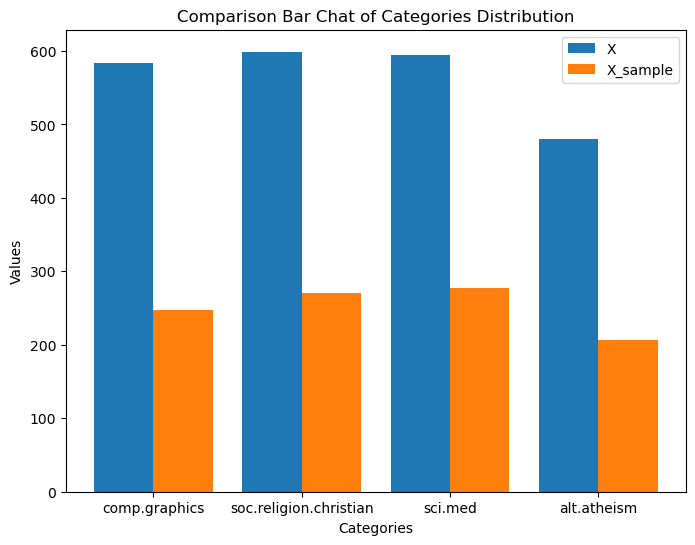

In [12]:
import numpy as np  
import matplotlib.pyplot as plt  
  
categories = list(X['category_name'].unique())
values_X = X['category_name'].value_counts()[categories].values
values_Xsample = X_sample['category_name'].value_counts()[categories].values

plt.figure(figsize=(8, 6))
n = np.arange(len(categories))

plt.bar(n-0.2, values_X, width=0.4, label='X', align='center')
plt.bar(n+0.2, values_Xsample, width=0.4, label='X_sample', align='center')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparison Bar Chat of Categories Distribution')
plt.xticks(n, categories)
plt.legend()
plt.show()

In [13]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x)) #split the content of 'text'

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape) #(2257, 35788) #(size of document, size of vocabularies)
print(X_counts[0])

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [15]:
X['unigrams'][0]

['From',
 ':',
 'sd345',
 '@',
 'city.ac.uk',
 '(',
 'Michael',
 'Collier',
 ')',
 'Subject',
 ':',
 'Converting',
 'images',
 'to',
 'HP',
 'LaserJet',
 'III',
 '?',
 'Nntp-Posting-Host',
 ':',
 'hampton',
 'Organization',
 ':',
 'The',
 'City',
 'University',
 'Lines',
 ':',
 '14',
 'Does',
 'anyone',
 'know',
 'of',
 'a',
 'good',
 'way',
 '(',
 'standard',
 'PC',
 'application/PD',
 'utility',
 ')',
 'to',
 'convert',
 'tif/img/tga',
 'files',
 'into',
 'LaserJet',
 'III',
 'format',
 '.',
 'We',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 ',',
 'converting',
 'to',
 'HPGL',
 '(',
 'HP',
 'plotter',
 ')',
 'files',
 '.',
 'Please',
 'email',
 'any',
 'response',
 '.',
 'Is',
 'this',
 'the',
 'correct',
 'group',
 '?',
 'Thanks',
 'in',
 'advance',
 '.',
 'Michael',
 '.',
 '--',
 'Michael',
 'Collier',
 '(',
 'Programmer',
 ')',
 'The',
 'Computer',
 'Unit',
 ',',
 'Email',
 ':',
 'M.P.Collier',
 '@',
 'uk.ac.city',
 'The',
 'City',
 'University',
 ',',
 'Tel',
 ':'

In [16]:
analyze = count_vect.build_analyzer()
analyze(X.text[0])
#stop words (I/you/he/she... are not meaningful)
# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [17]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

### >>> **Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [18]:
# 找到值等于1的元素的索引
indices = np.where(X_counts[4, 0:100].toarray()[0] == 1)

# 打印索引
print(indices)

(array([ 0, 37], dtype=int64),)


In [19]:
count_vect.get_feature_names_out()[indices]
'''
the another 1 is number 37 term, and the content is "01"
'''

'\nthe another 1 is number 37 term, and the content is "01"\n'

### >>> **Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

term_the  term_of  term_to  term_and  term_is  term_in  term_that  \
doc_0            5        1        4         0        1        1          0   
doc_1           11        8        4         0       10        2          0   
doc_2           14       10       26         9        4        6          8   
doc_3            6        2        0         1        1        3          0   
doc_4           10        3        8         3        2        3          1   
...            ...      ...      ...       ...      ...      ...        ...   
doc_2252         0        4        0         1        0        0          0   
doc_2253        63       40       32        48       17       22          5   
doc_2254        26       17       13        12       14        3         11   
doc_2255       123       68       64        59       23       24          8   
doc_2256         6        2        0         0        2        1          0   

          term_it  term_you  term_for  
doc_0           0         0         0  
doc_1           2         0         2  
doc_2           8        13         6  
doc_3           0         0         1  
doc_4           1         1         2  
...           ...       ...       ...  
doc_2252        0         1         2  
doc_2253        9         5        14  
doc_2254        5         3         3  
doc_2255       14        50        32  
doc_2256        0         2         1  

[2257 rows x 10 columns]

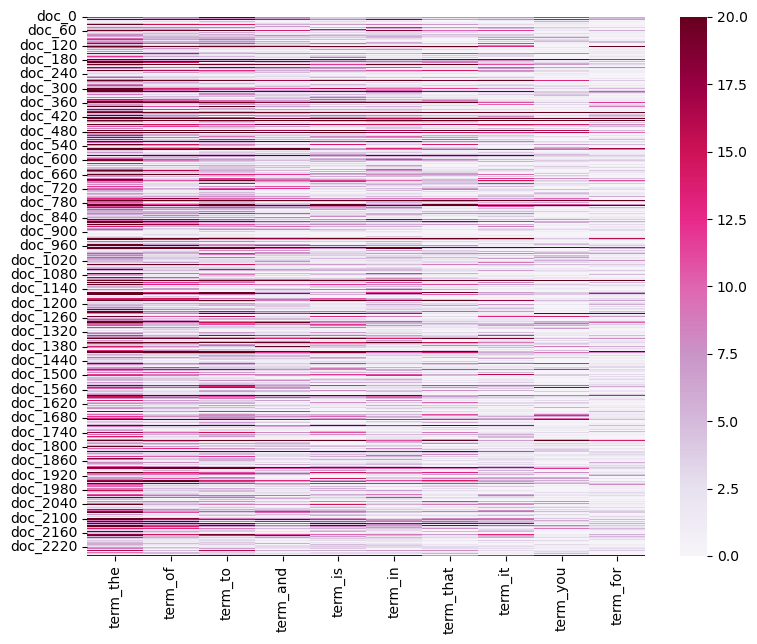

In [20]:
# Answer here
'''Observe the 10 most frequently occurring words'''
import seaborn as sns
word_list = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
doc_list = ["doc_"+ str(i) for i in list(X.index)]
count_list = X_counts.toarray() #X_counts[how many documents, how many terms]

df_all = pd.DataFrame(count_list, columns = word_list, index = doc_list)
s = df_all.sum()
df_heat= df_all[s.sort_values(ascending=False).index[:10]]

display(df_heat)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_heat,
                 cmap="PuRd",
                 vmin=0, vmax=20)

### >>> **Exercise 12 (take home):**

Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [21]:
from sklearn.decomposition import PCA
print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2257, 3)


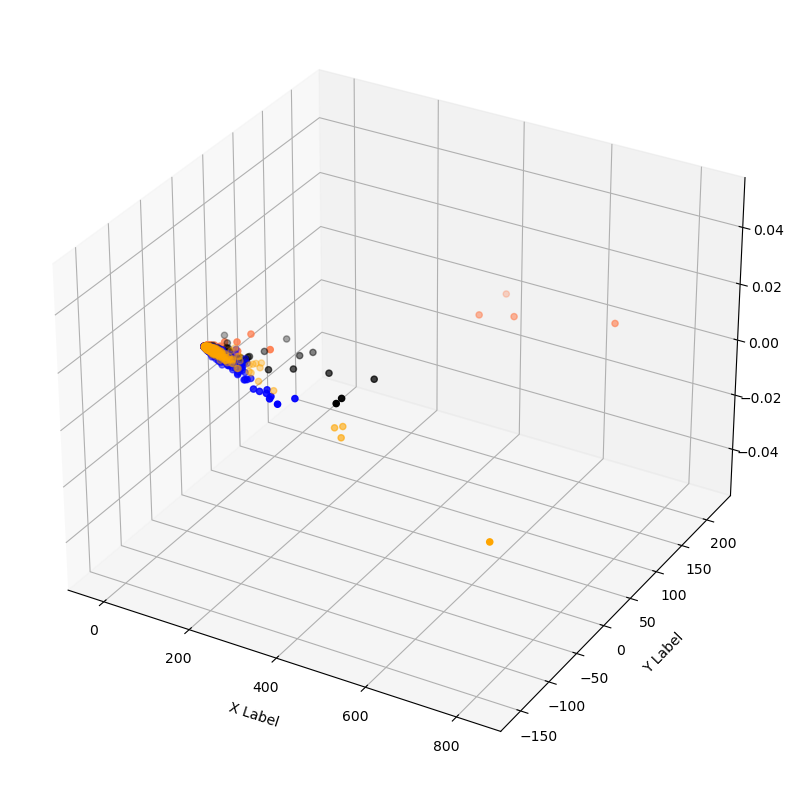

In [22]:
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

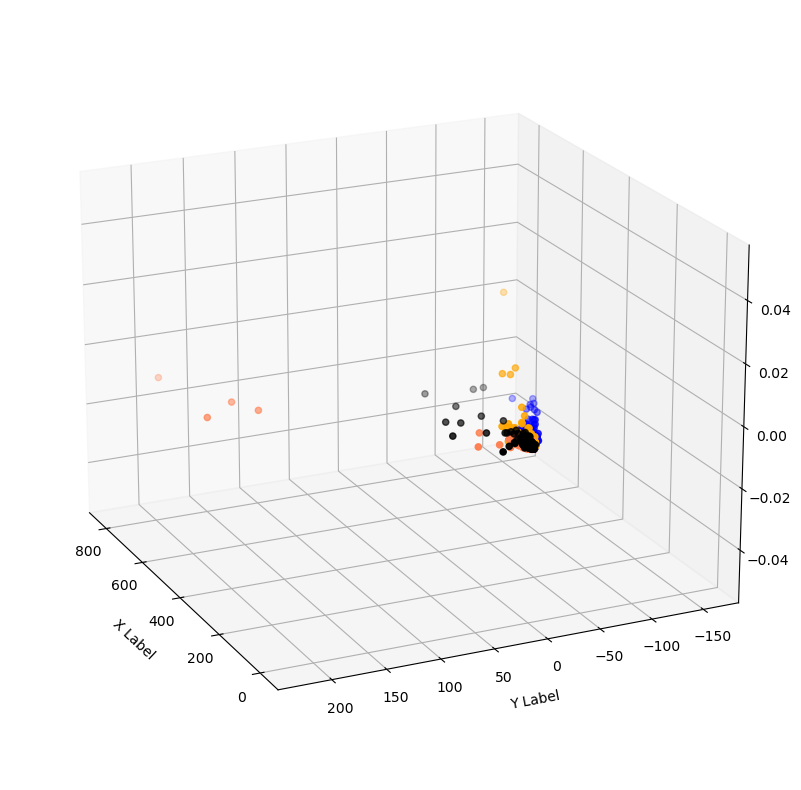

In [23]:
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.view_init(elev=20, azim=155)

plt.show()

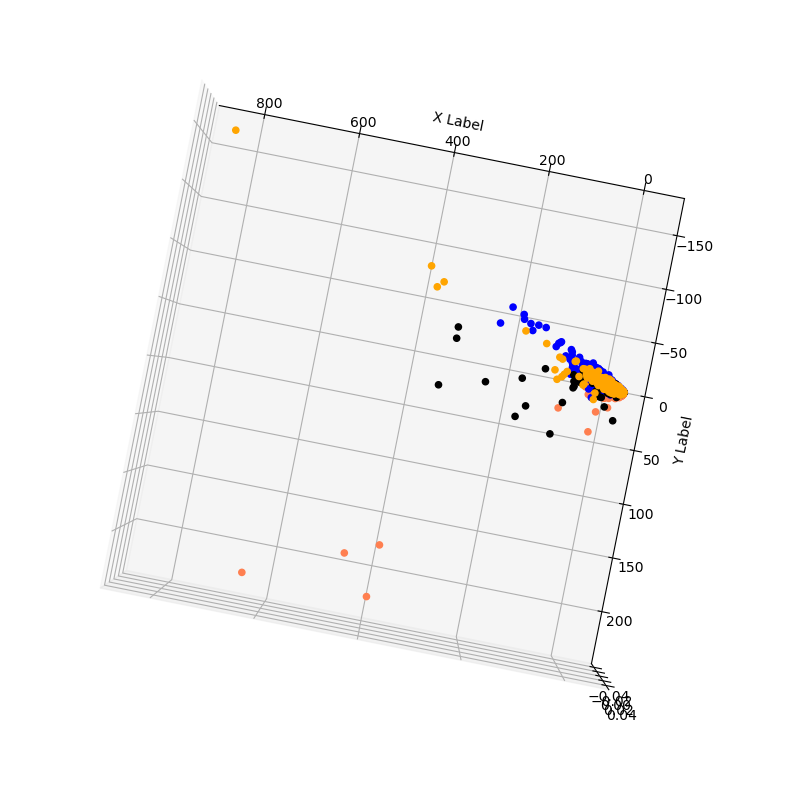

In [24]:
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.view_init(elev=90, azim=100)  # 改变elev和azim的值来旋转坐标轴

plt.show()

In [25]:
'''
From the three figures above, we can know that there are some part are overlap in four colors.
But their ranges are are different.
For example, the blue distribution is more concentrated and the yellow distribution is more scattered.
'''

'\nFrom the three figures above, we can know that there are some part are overlap in four colors.\nBut their ranges are are different.\nFor example, the blue distribution is more concentrated and the yellow distribution is more scattered.\n'

In [26]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

35788


In [27]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


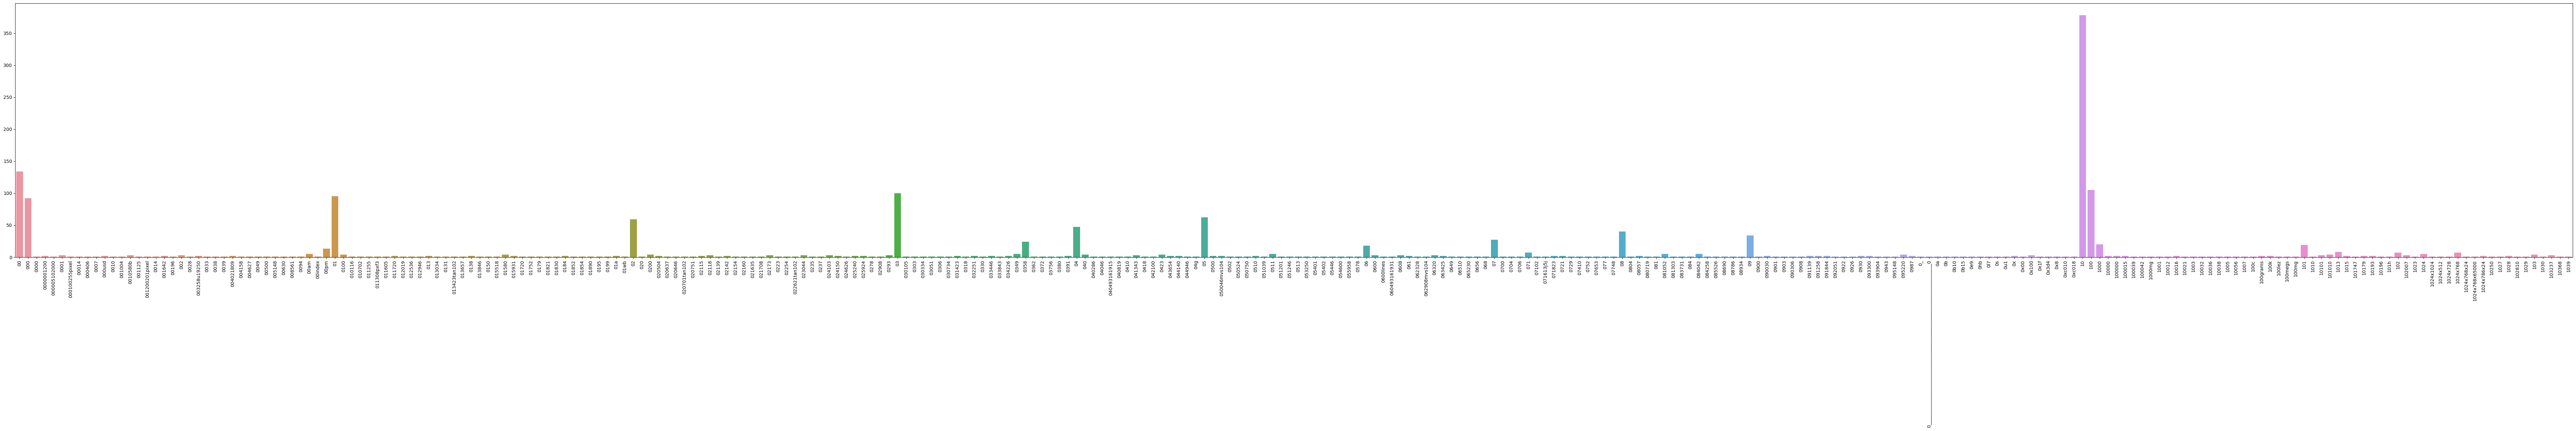

In [28]:
import seaborn as sns
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [29]:
import plotly.express as px

fig = px.bar(term_frequencies, x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300]
             , title="Interactive Visualization")
fig.update_layout(width=1000, height=800)  # 设置宽度和高度
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [30]:
'''only observe the words which frequency is more than 2000'''

'only observe the words which frequency is more than 2000'

In [31]:
indexes = np.where(term_frequencies > 2000)[0]
len(indexes)

44

In [32]:
filtered_term_frequencies = term_frequencies[indexes]

C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



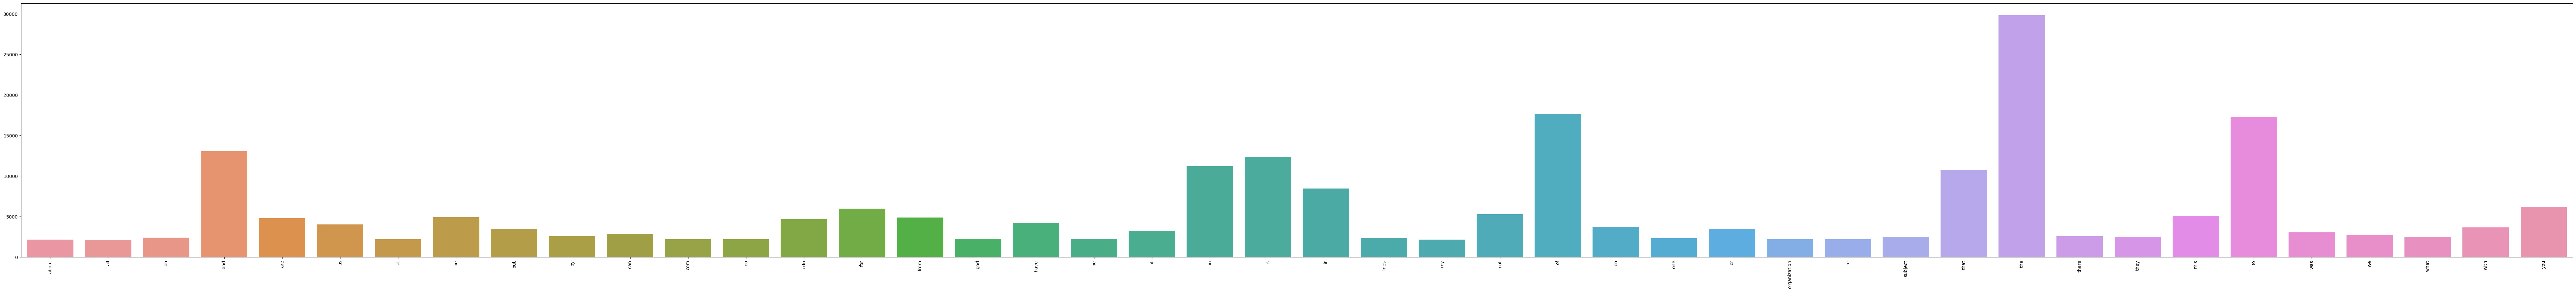

In [33]:
import seaborn as sns
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[indexes], 
            y=filtered_term_frequencies)

g.set_xticklabels(count_vect.get_feature_names_out()[indexes], rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [34]:
sorted_indices = np.argsort(term_frequencies)[::-1]
sorted_term_frequencies = term_frequencies[sorted_indices]

In [35]:
count_vect.get_feature_names_out()[sorted_indices]

array(['the', 'of', 'to', ..., 'jadaley', 'jafar', 'inguinal'],
      dtype=object)

C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



[Text(0, 0, 'the'),
 Text(1, 0, 'of'),
 Text(2, 0, 'to'),
 Text(3, 0, 'and'),
 Text(4, 0, 'is'),
 Text(5, 0, 'in'),
 Text(6, 0, 'that'),
 Text(7, 0, 'it'),
 Text(8, 0, 'you'),
 Text(9, 0, 'for'),
 Text(10, 0, 'not'),
 Text(11, 0, 'this'),
 Text(12, 0, 'be'),
 Text(13, 0, 'from'),
 Text(14, 0, 'are'),
 Text(15, 0, 'edu'),
 Text(16, 0, 'have'),
 Text(17, 0, 'as'),
 Text(18, 0, 'on'),
 Text(19, 0, 'with'),
 Text(20, 0, 'but'),
 Text(21, 0, 'or'),
 Text(22, 0, 'if'),
 Text(23, 0, 'was'),
 Text(24, 0, 'can'),
 Text(25, 0, 'we'),
 Text(26, 0, 'there'),
 Text(27, 0, 'by'),
 Text(28, 0, 'what'),
 Text(29, 0, 'subject'),
 Text(30, 0, 'they'),
 Text(31, 0, 'an'),
 Text(32, 0, 'lines'),
 Text(33, 0, 'one'),
 Text(34, 0, 'he'),
 Text(35, 0, 'god'),
 Text(36, 0, 'do'),
 Text(37, 0, 'organization'),
 Text(38, 0, 'at'),
 Text(39, 0, 're'),
 Text(40, 0, 'com'),
 Text(41, 0, 'about'),
 Text(42, 0, 'my'),
 Text(43, 0, 'all'),
 Text(44, 0, 'would'),
 Text(45, 0, 'will'),
 Text(46, 0, 'so'),
 Text(47, 0, 

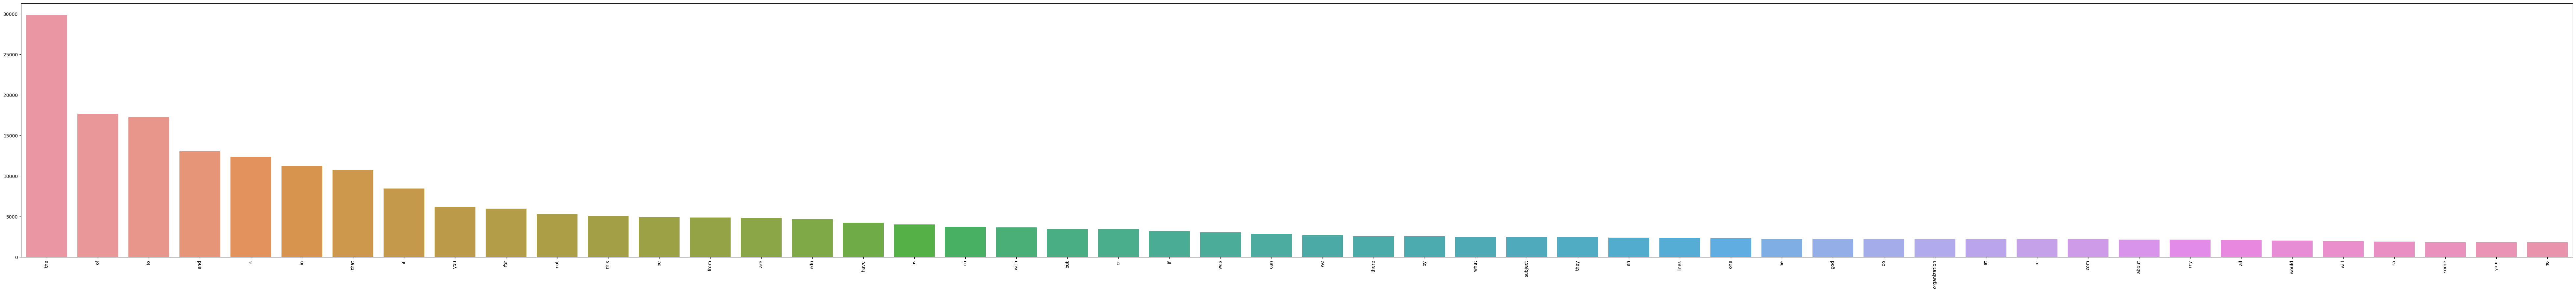

In [36]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[sorted_indices][:50], 
            y=term_frequencies[sorted_indices][:50])
g.set_xticklabels(count_vect.get_feature_names_out()[sorted_indices][:50], rotation = 90)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [37]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [38]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

LabelBinarizer()

In [39]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [40]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

  bin_category_name  
0      [0, 1, 0, 0]  
1      [0, 1, 0, 0]  
2      [0, 0, 0, 1]  
3      [0, 0, 0, 1]  
4      [0, 0, 0, 1]  
5      [0, 0, 0, 1]  
6      [0, 0, 0, 1]  
7      [0, 0, 1, 0]  
8      [0, 0, 1, 0]

---

## New dataset

### Load Data

In [41]:
import pandas as pd
# Initialize an empty list to store records
data = []
path1 = './sentiment+labelled+sentences/sentiment labelled sentences/amazon_cells_labelled.txt'
path2 = './sentiment+labelled+sentences/sentiment labelled sentences/imdb_labelled.txt'
path3 = './sentiment+labelled+sentences/sentiment labelled sentences/yelp_labelled.txt'
file_paths =[path1, path2, path3]

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            sentence, score = line.strip().split('\t')
            data.append([sentence, int(score)])

# Create a DataFrame from the list of records
data = pd.DataFrame(data, columns=['Sentence', 'Score'])
data

Sentence  Score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2995  I think food should have flavor and texture an...      0
2996                           Appetite instantly gone.      0
2997  Overall I was not impressed and would not go b...      0
2998  The whole experience was underwhelming, and I ...      0
2999  Then, as if I hadn't wasted enough of my life ...      0

[3000 rows x 2 columns]

In [42]:
labels = data['Score'].unique()
labels

array([0, 1], dtype=int64)

In [43]:
for t in data['Sentence'][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


### Observe missing value and duplicates

In [44]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence                               Score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [45]:
sum(data.duplicated())

17

In [46]:
sum(data.duplicated('Sentence'))

17

In [47]:
data[data.duplicated()]

Sentence  Score
285                                       Great phone!.      1
407                                        Works great.      1
524                                       Works great!.      1
543                             Don't buy this product.      0
744   If you like a loud buzzing to override all you...      0
748                                       Does not fit.      0
778                               This is a great deal.      1
792                                        Great Phone.      1
892                    Excellent product for the price.      1
896                                        Great phone.      1
1363                   Definitely worth checking out.        1
1585                                 Not recommended.        0
1788                                            10/10        1
2814                                 I love this place.      1
2816                             The food was terrible.      0
2843                                   I won't be back.      0
2846                  I would not recommend this place.      0

In [48]:
data.drop_duplicates(keep="first", inplace=True)

In [49]:
data.reset_index(inplace=True, drop=True)
data

Sentence  Score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2978  I think food should have flavor and texture an...      0
2979                           Appetite instantly gone.      0
2980  Overall I was not impressed and would not go b...      0
2981  The whole experience was underwhelming, and I ...      0
2982  Then, as if I hadn't wasted enough of my life ...      0

[2983 rows x 2 columns]

### Observe the distribution
The original dataset have 1500 positive (score1) and 1500 negative (score0)
After drop the duplicates, it becomes 1493 and 1490 records.

Score
0    1493
1    1490
Name: count, dtype: int64


<Axes: title={'center': 'Score distribution'}, xlabel='Score'>

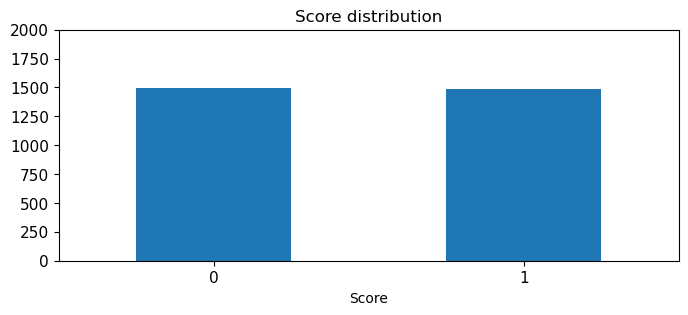

In [50]:
print(data.Score.value_counts())
data.Score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, 2000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### Feature Creation

In [51]:
import nltk
data['unigrams'] = data['Sentence'].apply(lambda x: dmh.tokenize_text(x))

In [52]:
data[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

### Feature subset selection

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect_data = CountVectorizer()
data_counts = count_vect_data.fit_transform(data.Sentence) #learn the vocabulary and return document-term matrix
print(data_counts.shape)
print(data_counts[0])

(2983, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [54]:
analyze_data = count_vect_data.build_analyzer()
analyze_data(data.Sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [55]:
analyze_data(data.Sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [56]:
data_counts.shape

(2983, 5155)

In [57]:
count_vect_data.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [58]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect_data.get_feature_names_out()[0:20]]
print(plot_x)
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
print(plot_y)
plot_z = data_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0

term_the  term_and  term_it  term_is  term_to  term_this  term_of  \
doc_0            1         0        1        1        1          0        0   
doc_1            0         0        0        0        0          0        0   
doc_2            1         0        0        0        0          0        0   
doc_3            0         0        0        0        1          0        0   
doc_4            1         0        0        1        0          0        0   
...            ...       ...      ...      ...      ...        ...      ...   
doc_2978         0         2        0        0        0          0        0   
doc_2979         0         0        0        0        0          0        0   
doc_2980         0         1        0        0        0          0        0   
doc_2981         1         1        0        0        1          0        0   
doc_2982         3         0        1        0        1          0        1   

          term_was  term_in  term_for  
doc_0            0        2         1  
doc_1            0        0         0  
doc_2            0        0         1  
doc_3            0        0         1  
doc_4            0        0         0  
...            ...      ...       ...  
doc_2978         0        0         0  
doc_2979         0        0         0  
doc_2980         1        0         0  
doc_2981         1        0         0  
doc_2982         0        1         0  

[2983 rows x 10 columns]

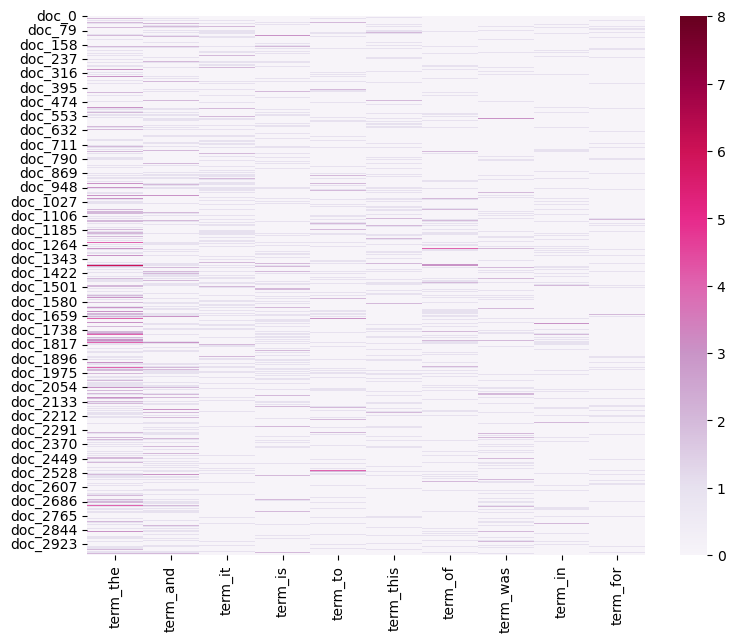

In [59]:
# Answer here
'''Observe the 10 most frequently occurring words'''
import seaborn as sns
import matplotlib.pyplot as plt
word_list = ["term_"+str(i) for i in count_vect_data.get_feature_names_out()]
doc_list = ["doc_"+ str(i) for i in list(data.index)]
count_list = data_counts.toarray() 

data_all = pd.DataFrame(count_list, columns = word_list, index = doc_list)
s = data_all.sum()
data_heat= data_all[s.sort_values(ascending=False).index[:10]]

display(data_heat)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(data_heat,
                 cmap="PuRd")

In [60]:
term_frequencies = []
print(data_counts.shape[1])
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

5155


In [61]:
# Answer here
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
indexes = np.where(term_frequencies > 500)[0]
print(len(indexes))
print(np.max(term_frequencies))

8
1951


In [62]:
filtered_term_frequencies = term_frequencies[indexes]

In [63]:
# Answer here
sorted_indices = np.argsort(term_frequencies)[::-1]
sorted_term_frequencies = term_frequencies[sorted_indices]

In [64]:
count_vect_data.get_feature_names_out()[sorted_indices]

array(['the', 'and', 'it', ..., 'morning', 'moods', '00'], dtype=object)

C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



[Text(0, 0, 'the'),
 Text(1, 0, 'and'),
 Text(2, 0, 'it'),
 Text(3, 0, 'is'),
 Text(4, 0, 'to'),
 Text(5, 0, 'this'),
 Text(6, 0, 'of'),
 Text(7, 0, 'was'),
 Text(8, 0, 'in'),
 Text(9, 0, 'for')]

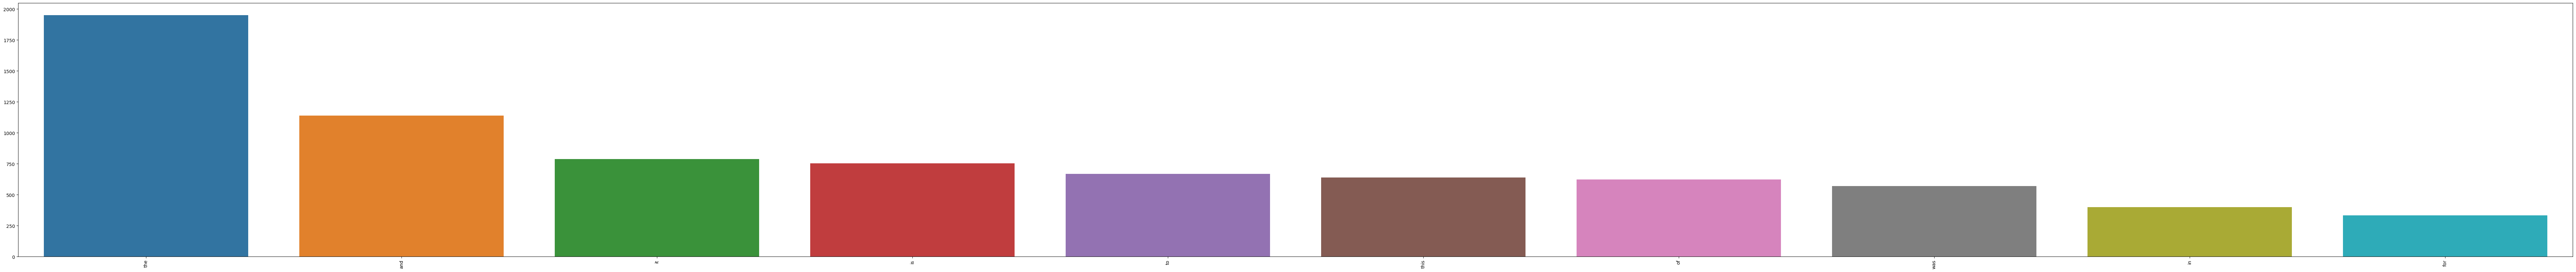

In [65]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_data.get_feature_names_out()[sorted_indices][:10], 
            y=term_frequencies[sorted_indices][:10])
g.set_xticklabels(count_vect_data.get_feature_names_out()[sorted_indices][:10], rotation = 90)

## Part3

### TF-IDF

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_data = TfidfVectorizer()
data_tfidf = tfidf_vect_data.fit_transform(data.Sentence)
print(data_tfidf.shape)
print(data_tfidf[0])

(2983, 5155)
  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557


In [67]:
tfidf_vect_data.get_feature_names_out()[3217]

'painful'

In [70]:
analyze_data_tfidf = tfidf_vect_data.build_analyzer()
analyze_data_tfidf(data.Sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [71]:
data_tfidf.shape

(2983, 5155)

In [72]:
tfidf_vect_data.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [73]:
# first twenty features only
plot_x = ["term_"+str(i) for i in tfidf_vect_data.get_feature_names_out()[0:20]]
print(plot_x)
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
print(plot_y)
plot_z = data_tfidf[0:20, 0:20].toarray()
print(plot_z)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

term_the  term_and   term_it   term_is  term_this  term_was  \
doc_0     0.086610  0.000000  0.119674  0.120689        0.0  0.000000   
doc_1     0.000000  0.000000  0.000000  0.000000        0.0  0.000000   
doc_2     0.195022  0.000000  0.000000  0.000000        0.0  0.000000   
doc_3     0.000000  0.000000  0.000000  0.000000        0.0  0.000000   
doc_4     0.204354  0.000000  0.000000  0.284763        0.0  0.000000   
...            ...       ...       ...       ...        ...       ...   
doc_2978  0.000000  0.243903  0.000000  0.000000        0.0  0.000000   
doc_2979  0.000000  0.000000  0.000000  0.000000        0.0  0.000000   
doc_2980  0.000000  0.153830  0.000000  0.000000        0.0  0.198800   
doc_2981  0.085639  0.102103  0.000000  0.000000        0.0  0.131952   
doc_2982  0.191265  0.000000  0.088094  0.000000        0.0  0.000000   

           term_to   term_of  term_not   term_in  
doc_0     0.127440  0.000000  0.000000  0.295387  
doc_1     0.000000  0.000000  0.000000  0.000000  
doc_2     0.000000  0.000000  0.000000  0.000000  
doc_3     0.120671  0.000000  0.000000  0.000000  
doc_4     0.000000  0.000000  0.000000  0.000000  
...            ...       ...       ...       ...  
doc_2978  0.000000  0.000000  0.000000  0.000000  
doc_2979  0.000000  0.000000  0.000000  0.000000  
doc_2980  0.000000  0.000000  0.476505  0.000000  
doc_2981  0.126010  0.000000  0.000000  0.000000  
doc_2982  0.093810  0.095527  0.000000  0.108720  

[2983 rows x 10 columns]

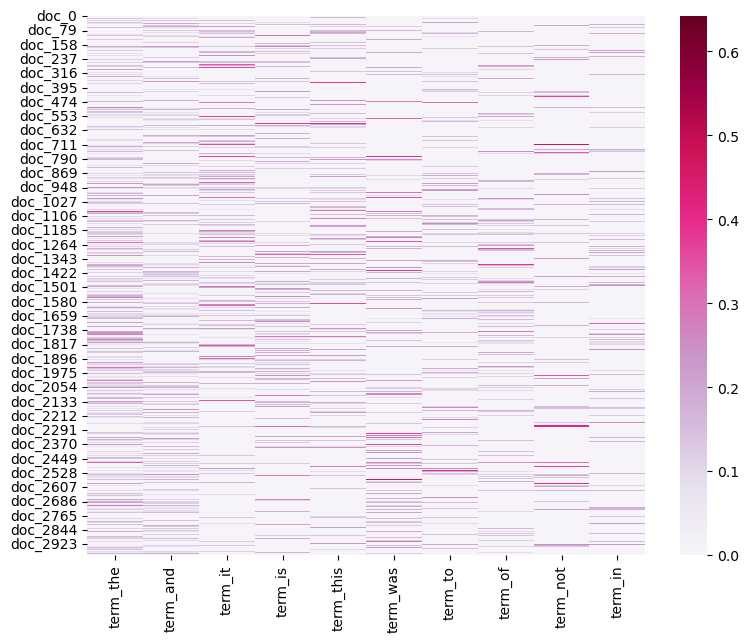

In [74]:
'''Observe the 10 most frequently occurring words'''
import seaborn as sns
import matplotlib.pyplot as plt
word_list = ["term_"+str(i) for i in tfidf_vect_data.get_feature_names_out()]
doc_list = ["doc_"+ str(i) for i in list(data.index)]
tfidf_count_list = data_tfidf.toarray() 

data_all = pd.DataFrame(tfidf_count_list, columns = word_list, index = doc_list)
s = data_all.sum()
data_heat= data_all[s.sort_values(ascending=False).index[:10]]

display(data_heat)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(data_heat,
                 cmap="PuRd")

In [75]:
term_tfidf = []
print(data_tfidf.shape[1])
for j in range(0,data_tfidf.shape[1]):
    term_tfidf.append(sum(data_tfidf[:,j].toarray()))

5155


In [76]:
# Answer here
term_tfidf = np.asarray(data_tfidf.sum(axis=0))[0]
indexes = np.where(term_tfidf > 50)[0]
print(len(indexes))
print(np.max(term_tfidf))

14
176.9144376796202


In [77]:
filtered_term_tfidf = term_tfidf[indexes]

In [78]:
sorted_indices = np.argsort(term_tfidf)[::-1]
sorted_term_tfidf = term_tfidf[sorted_indices]

In [79]:
tfidf_vect_data.get_feature_names_out()[sorted_indices]

array(['the', 'and', 'it', ..., 'yelps', 'lid', 'curtain'], dtype=object)

C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\carrie\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



[Text(0, 0, 'the'),
 Text(1, 0, 'and'),
 Text(2, 0, 'it'),
 Text(3, 0, 'is'),
 Text(4, 0, 'this'),
 Text(5, 0, 'was'),
 Text(6, 0, 'to'),
 Text(7, 0, 'of'),
 Text(8, 0, 'not'),
 Text(9, 0, 'in')]

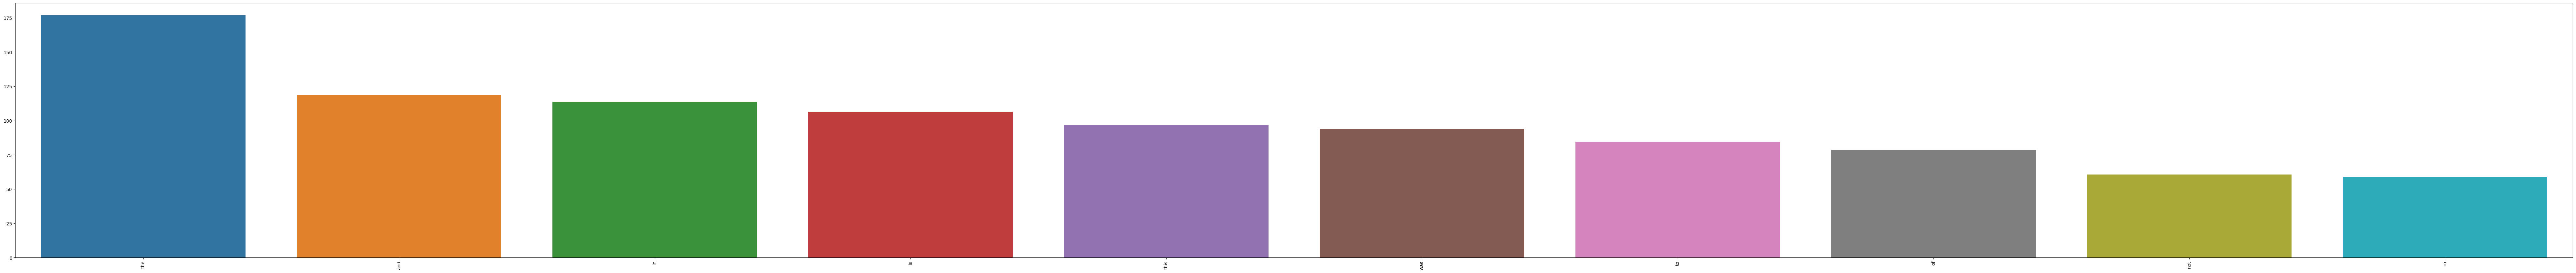

In [80]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=tfidf_vect_data.get_feature_names_out()[sorted_indices][:10], 
            y=term_tfidf[sorted_indices][:10])
g.set_xticklabels(tfidf_vect_data.get_feature_names_out()[sorted_indices][:10], rotation = 90)

### Visulization and some observations

In [81]:
'''Although the data shape is the same, the scores are different (term frequency and tf-idf score) '''
print(data_counts.shape)
print(data_counts[0])
print("-------------------------------------------")
print(data_tfidf.shape)
print(data_tfidf[0])

(2983, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1
-------------------------------------------
(2983, 5155)
  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557


In [111]:
'''The top ten words are the same, but the scores are different'''
top_ten_rank = pd.DataFrame()
a = 0
b = 20
top_ten_rank["Rank"]=[i for i in range(1,21)]
top_ten_rank["Feature Name (Term Frequency)"]=count_vect_data.get_feature_names_out()[sorted_indices][a:b]
top_ten_rank["Term Frequency"] = term_frequencies[sorted_indices][a:b]
top_ten_rank["Feature Name (TF-IDF)"]=tfidf_vect_data.get_feature_names_out()[sorted_indices][a:b]
top_ten_rank["TF-IDF"]= term_tfidf[sorted_indices][a:b]
top_ten_rank

Rank Feature Name (Term Frequency)  Term Frequency Feature Name (TF-IDF)  \
0      1                           the            1951                   the   
1      2                           and            1138                   and   
2      3                            it             789                    it   
3      4                            is             752                    is   
4      5                          this             638                  this   
5      6                           was             570                   was   
6      7                            to             669                    to   
7      8                            of             624                    of   
8      9                           not             303                   not   
9     10                            in             400                    in   
10    11                         great             204                 great   
11    12                          good             230                  good   
12    13                          very             245                  very   
13    14                           for             334                   for   
14    15                          that             316                  that   
15    16                          with             274                  with   
16    17                            my             254                    my   
17    18                           you             220                   you   
18    19                         phone             164                 phone   
19    20                            on             221                    on   

        TF-IDF  
0   176.914438  
1   118.548045  
2   113.735335  
3   106.388712  
4    96.864495  
5    93.835367  
6    84.368578  
7    78.535342  
8    60.590187  
9    58.818899  
10   58.218767  
11   57.703176  
12   57.504571  
13   54.984587  
14   49.265715  
15   45.838426  
16   44.597644  
17   41.766880  
18   40.273434  
19   38.749365

In [84]:
import helpers.text_analysis as ta
from wordcloud import WordCloud

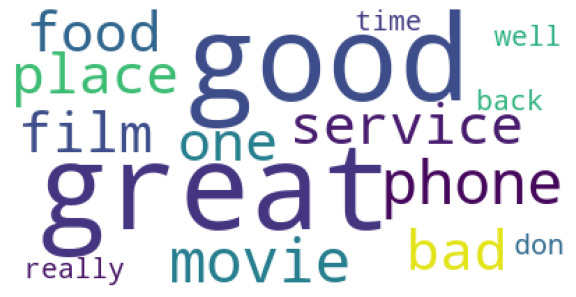

In [85]:
ta.plot_word_cloud(" ".join(count_vect_data.get_feature_names_out()[sorted_indices][:50]))

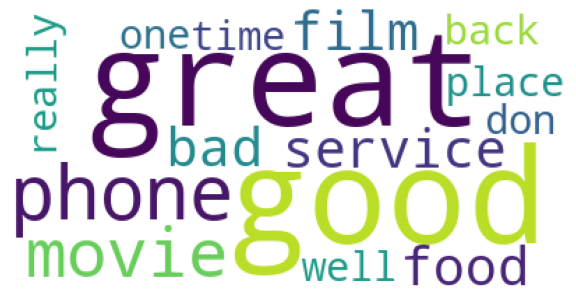

In [86]:
ta.plot_word_cloud(" ".join(tfidf_vect_data.get_feature_names_out()[sorted_indices][:50]))

### Naive Bayes

In [99]:
NB_tfidf = pd.DataFrame(data_tfidf.toarray(), columns = tfidf_vect_data.get_feature_names_out())
NB_tfidf['Score'] = data['Score']
NB_tfidf.mean()

00         0.000113
10         0.004152
100        0.000404
11         0.000236
12         0.000424
             ...   
zero       0.000718
zillion    0.000181
zombie     0.000184
zombiez    0.000107
Score      0.499497
Length: 5156, dtype: float64

In [100]:
NB_termfrequency = pd.DataFrame(data_counts.toarray(), columns = count_vect_data.get_feature_names_out())
NB_termfrequency['Score'] = data['Score']
NB_termfrequency.mean()

00         0.000335
10         0.012068
100        0.001006
11         0.000670
12         0.001341
             ...   
zero       0.002011
zillion    0.000335
zombie     0.000670
zombiez    0.000335
Score      0.499497
Length: 5156, dtype: float64

In [101]:
from sklearn.model_selection import train_test_split
tfidf_train, tfidf_test = train_test_split(NB_tfidf, test_size=0.2,random_state=42)
termfrequency_train, termfrequency_test = train_test_split(NB_termfrequency, test_size=0.2,random_state=42)

In [102]:
tfidf_train

00   10  100   11   12        13   15  15g  15pm   17  ...  yukon  yum  \
2737  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  ...    0.0  0.0   
2656  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  ...    0.0  0.0   
1251  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  ...    0.0  0.0   
1565  0.0  0.0  0.0  0.0  0.0  0.233213  0.0  0.0   0.0  0.0  ...    0.0  0.0   
509   0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  ...    0.0  0.0   
...   ...  ...  ...  ...  ...       ...  ...  ...   ...  ...  ...    ...  ...   
1638  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  ...    0.0  0.0   
1095  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  ...    0.0  0.0   
1130  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  ...    0.0  0.0   
1294  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  ...    0.0  0.0   
860   0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  ...    0.0  0.0   

      yummy  yun  z500a  zero  zillion  zombie  zombiez  Score  
2737    0.0  0.0    0.0   0.0      0.0     0.0      0.0      1  
2656    0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  
1251    0.0  0.0    0.0   0.0      0.0     0.0      0.0      1  
1565    0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  
509     0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  
...     ...  ...    ...   ...      ...     ...      ...    ...  
1638    0.0  0.0    0.0   0.0      0.0     0.0      0.0      1  
1095    0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  
1130    0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  
1294    0.0  0.0    0.0   0.0      0.0     0.0      0.0      1  
860     0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  

[2386 rows x 5156 columns]

In [103]:
tfidf_Y_train = tfidf_train["Score"]
tfidf_X_train = tfidf_train.drop(["Score"],axis=1)
tfidf_Y_test = tfidf_test["Score"]
tfidf_X_test = tfidf_test.drop(["Score"],axis=1)

termfrequency_Y_train = termfrequency_train["Score"]
termfrequency_X_train = termfrequency_train.drop(["Score"],axis=1)
termfrequency_Y_test = termfrequency_test["Score"]
termfrequency_X_test = termfrequency_test.drop(["Score"],axis=1)

In [104]:
from sklearn.naive_bayes import BernoulliNB
tfidf_bnb = BernoulliNB(binarize=None)
tfidf_bnb.fit(tfidf_X_train, tfidf_Y_train)
tfidf_bnb.score(tfidf_X_test, tfidf_Y_test)

0.8274706867671692

In [105]:
termfrequency_bnb = BernoulliNB(binarize=None)
termfrequency_bnb.fit(termfrequency_X_train, termfrequency_Y_train)
termfrequency_bnb.score(termfrequency_X_test, termfrequency_Y_test)

0.830820770519263

In [ ]:
'''
This is a binary class classification problem, so i choose using BernoulliNB
And settnig the binarize parameter to be None, let features have wide ranges
The result shows term frequency is better than TF-IDF
It may be different if i do another data preprocessing.
'''

## Part 4

In [ ]:
'''
1. there are lots of stop words didn't be removed, we can use the parameter stop_words='english' to filter more stop words
2. we didn't use the unigrams column
3. I think some visulization are useless, for example, heatmap
'''